In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Stationarity in Time Series Data**

Time series is different from more traditional classification and regression predictive modeling problems. The temporal structure adds an order to the observations. This imposed order means that important assumptions about the consistency of those observations needs to be handled specifically. For example, when modeling, there are assumptions that the summary statistics of observations are consistent. In time series terminology, we refer to this expectation as the time series being stationary. These assumptions can be easily violated in time series by the addition of a trend, seasonality, and other time-dependent structures. In this tutorial, you will discover how to check if your time series is stationary with Python. After completing this tutorial, you will know:
- How to identify obvious stationary and non-stationary time series using line plot.
- How to spot-check summary statistics like mean and variance for a change over time.
- How to use statistical tests with statistical significance to check if a time series is stationary.


**Stationary Time Series**

The observations in a stationary time series are not dependent on time. Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations. When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective. Below is an example of the Daily Female Births dataset that is stationary.

Text(0.5, 1.0, 'Line plot of the stationary Daily Female Births time series dataset.')

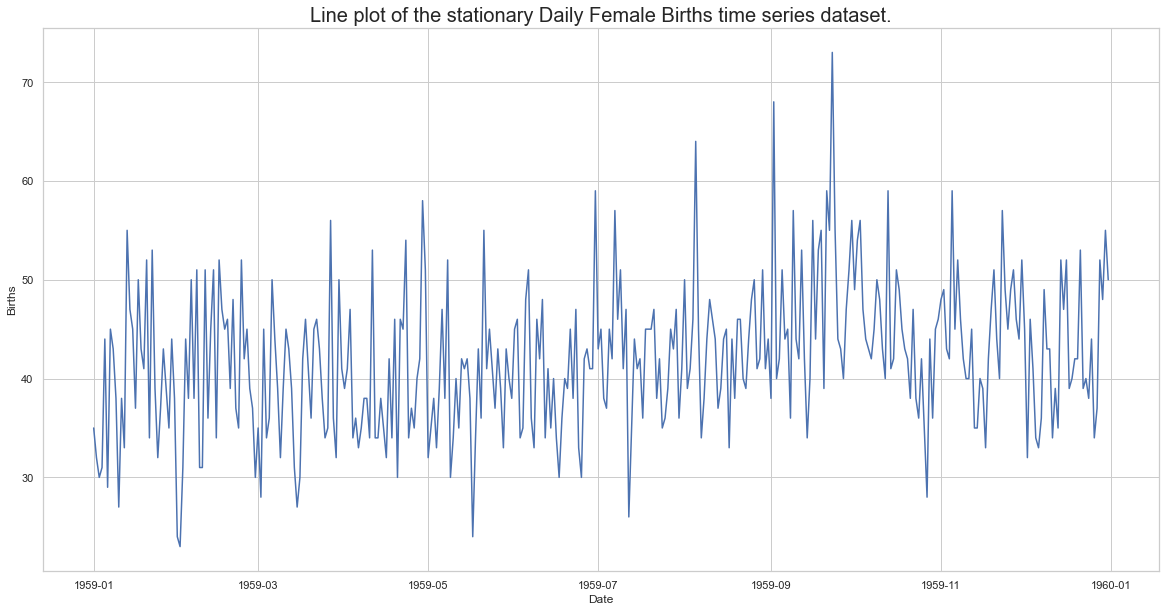

In [2]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)

sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=series)
ax.set_title("Line plot of the stationary Daily Female Births time series dataset.",fontsize=20)

**Non-Stationary Time Series**

Observations from a non-stationary time series show seasonal effects, trends, and other structures that depend on the time index. Summary statistics like the mean and variance do change over time, providing a drift in the concepts a model may try to capture. Classical time series analysis and forecasting methods are concerned with making non-stationary time series data stationary by identifying and removing trends and removing seasonal effects. Below is an example of the Airline Passengers dataset that is non-stationary, showing both trend and seasonal components.

Text(0.5, 1.0, 'Line plot of the non-stationary Airline Passengers time series dataset.')

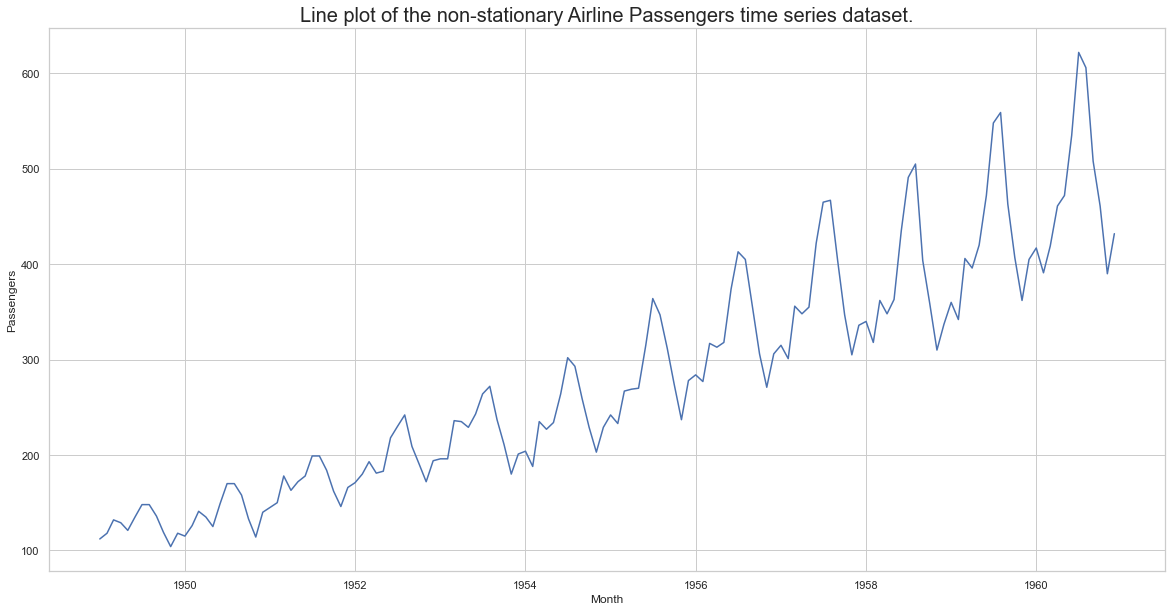

In [3]:
series_non = pd.read_csv('airline-passengers.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)


fig,ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=series_non)
ax.set_title("Line plot of the non-stationary Airline Passengers time series dataset.",fontsize=20)

**Types of Stationary Time Series**

The notion of stationarity comes from the theoretical study of time series and it is a useful abstraction when forecasting. There are some finer-grained notions of stationarity that you may 
come across if you dive deeper into this topic. They are:
- *Stationary Process:* A process that generates a stationary series of observations.
- *Stationary Model:* A model that describes a stationary series of observations.
- *Trend Stationary:* A time series that does not exhibit a trend.
- *Seasonal Stationary:* A time series that does not exhibit seasonality.
- *Strictly Stationary:* A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.


**Stationary Time Series and Forecasting**

Should you make your time series stationary? Generally, yes. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals. 

If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

Statistical time series methods and even modern machine learning methods will benefit from the clearer signal in the data. But...

We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the problem.

The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.


**Checks for Stationarity**

There are many methods to check whether a time series (direct observations, residuals, otherwise)
is stationary or non-stationary.
- *Look at Plots:* You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- *Summary Statistics:* You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
- *Statistical Tests:* You can use statistical tests to check if the expectations of stationarity are met or have been violated.

Above, we have already introduced the Daily Female Births and Airline Passengers datasets as stationary and non-stationary respectively with plots showing an obvious lack and presence of trend and seasonality components. Next, we will look at a quick and dirty way to calculate and review summary statistics on our time series dataset for checking to see if it is stationary.

**Summary Statistics**

A quick and dirty check to see if your time series is non-stationary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [4]:
series = pd.read_csv('daily-total-female-births.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)

Text(0.5, 1.0, 'Histogram plot of the Daily Female Births dataset.')

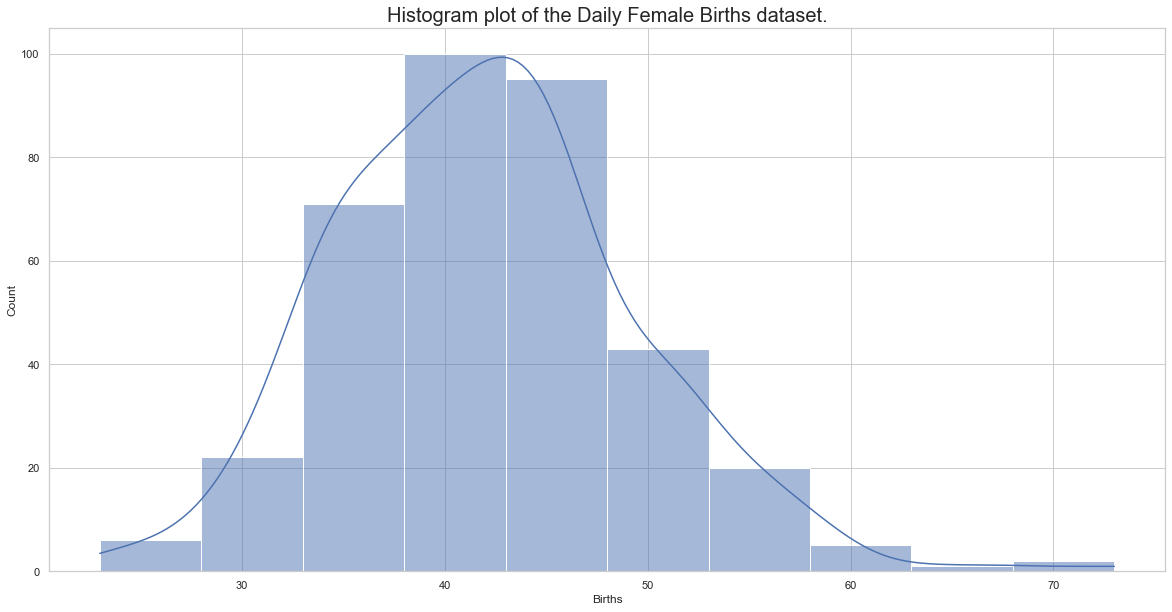

In [6]:
sns.set_theme(style="whitegrid")
fig,ax = plt.subplots(figsize=(20,10))

sns.histplot(data=series,bins=10,kde=True)
ax.set_title("Histogram plot of the Daily Female Births dataset.",fontsize=20)

In [7]:
# calculate statistics of partitioned time series data

X = series.values
split = int(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(), X2.mean()
var1,var2 = X1.var(), X2.var()

print('mean1= {}, mean2= {}'.format(mean1, mean2))
print('variance1= {}, variance2= {}'.format(var1, var2))

# Running this example shows that the mean and variance values are different,
# but in the same ball-park.

mean1= 39.76373626373626, mean2= 44.185792349726775
variance1= 49.21341021615746, variance2= 48.708650601690096


In [8]:
series_non = pd.read_csv('airline-passengers.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)


X = series_non.values
split = int(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(), X2.mean()
var1,var2 = X1.var(), X2.var()

print('mean1= {}, mean2= {}'.format(mean1, mean2))
print('variance1= {}, variance2= {}'.format(var1, var2))

# Running the example, we can see the mean and variance look very different. 
# We have a non-stationary time series.

mean1= 182.90277777777777, mean2= 377.69444444444446
variance1= 2244.0877700617284, variance2= 7367.962191358024


Text(0.5, 1.0, 'Line plot of the Airline Passengers dataset.')

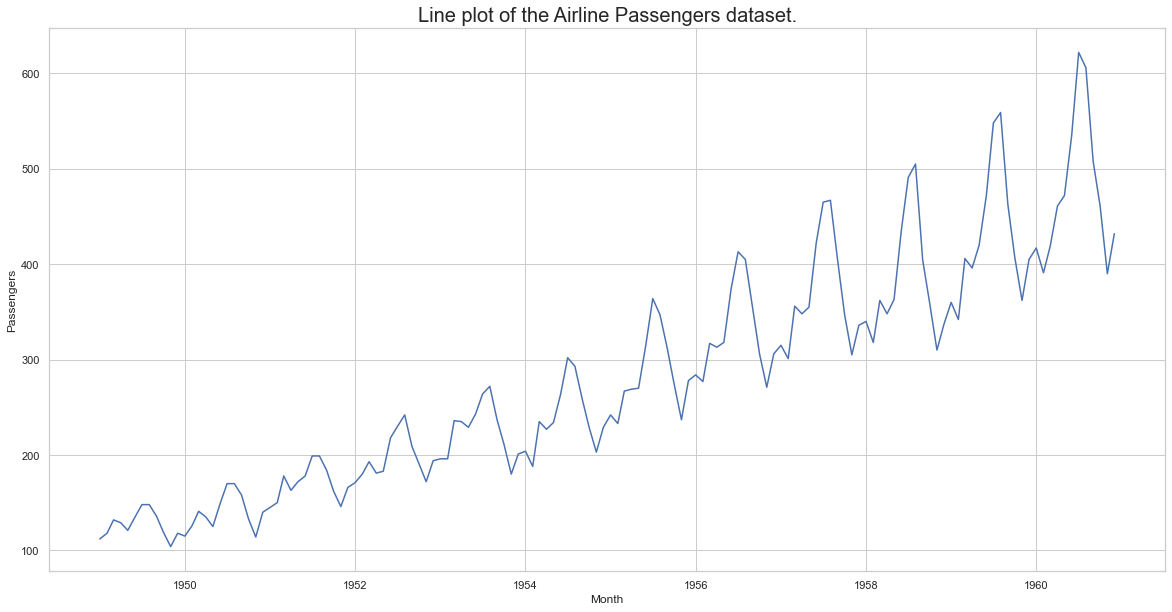

In [10]:
fig,ax = plt.subplots(figsize=(20,10))

sns.lineplot(data=series_non)
ax.set_title("Line plot of the Airline Passengers dataset.",fontsize=20)

Text(0.5, 1.0, 'Histogram plot of the Airline Passengers dataset.')

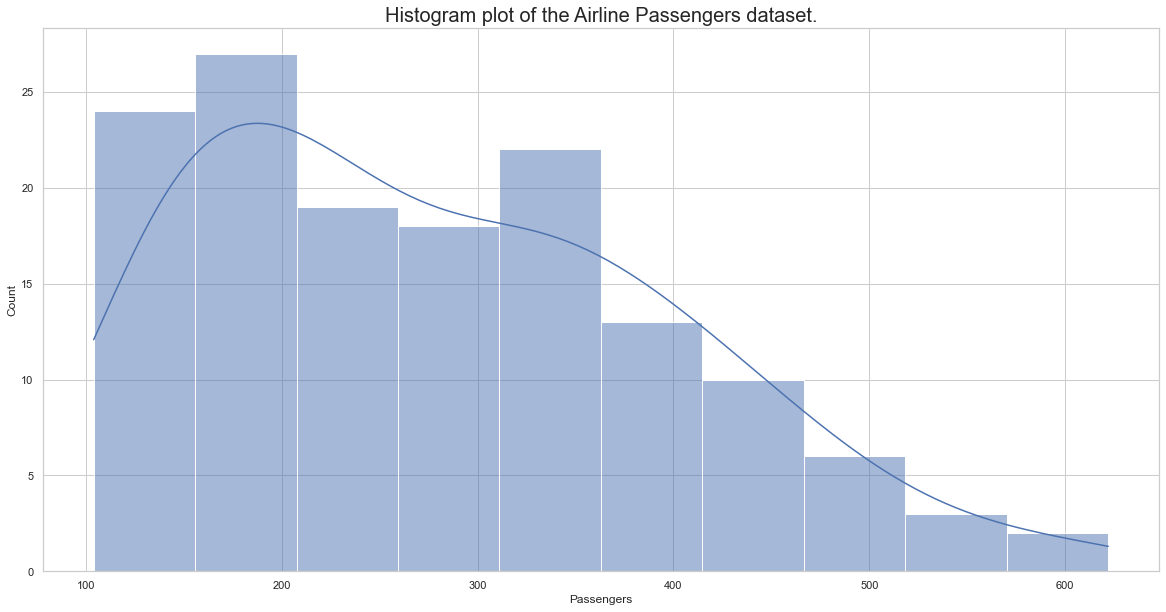

In [12]:
fig,ax = plt.subplots(figsize=(20,10))

sns.histplot(data=series_non,bins=10,kde=True)
ax.set_title("Histogram plot of the Airline Passengers dataset.",fontsize=20)

In [13]:
series_non.skew()

0.5831604861560892

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. This may suggest an exponential growth from season to season. A log transform can be used to  atten out exponential change back to a linear relationship. Below is the same histogram with a log transform of the time series.

In [14]:
# histogram and line plot of log transformed time series

X = series_non.values
X = np.log(X)

# X

In [15]:
index = []
values = []

for i in range(len(X)):
    index.append(i)
    values.append(X[i])

Text(0.5, 1.0, 'Line plot of the log-transformed Airline Passengers dataset.')

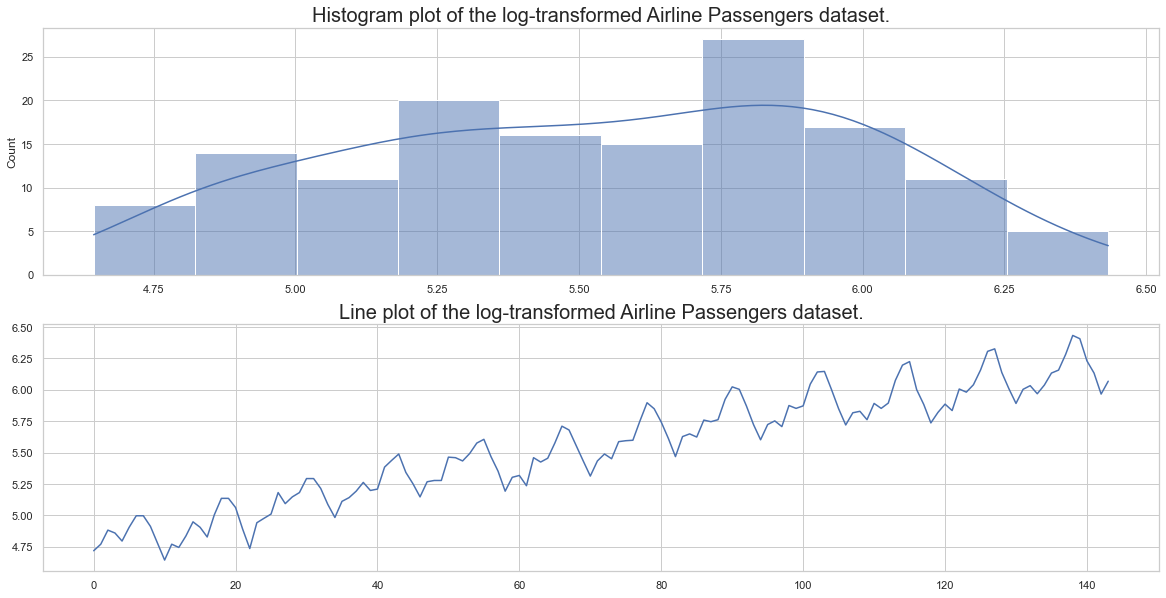

In [16]:
fig,ax = plt.subplots(2,1,figsize=(20,10))

plot1 = sns.histplot(data=X, ax=ax[0],kde=True,bins=10)

# https://stackoverflow.com/questions/54822884/how-to-change-the-x-axis-range-in-seaborn
# plot1.set_xlim(3,6)
# plot1.set_xticks(range(4,7))

plot1.set_title("Histogram plot of the log-transformed Airline Passengers dataset.",fontsize=20)


plot2 = sns.lineplot(data=X, ax=ax[1])

## OR
# plot2 = sns.lineplot(x=index,y=values, ax=ax[1])

## OR
# https://www.statology.org/matplotlib-rotate-tick-labels/
# plot2 = sns.lineplot(data=X, ax=ax[1])
# plot2.set_xlim(3,6)
# plot2.set_xticks(range(len(X)))
# plt.xticks(rotation=45)
plot2.set_title("Line plot of the log-transformed Airline Passengers dataset.",fontsize=20)

This is a quick and dirty method that may be easily fooled. We can use a statistical test to check if the difference between two samples of Gaussian random variables is real or a statistical fluke. We could explore statistical significance tests, like the Student's t-test, but things get tricky because of the serial correlation between values. In the next section, we will use a statistical test designed to explicitly comment on whether a univariate time series is stationary.

**Augmented Dickey-Fuller test**

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected (or fail to be rejected). The result must be interpreted for a given problem to be meaningful. Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary. The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
- *Null Hypothesis (H0):* Fail to reject, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- *Alternate Hypothesis (H1):* The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).
- **p-value > 0.05:** Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- **p-value <= 0.05:** Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [17]:
# calculate stationarity test of time series data

from statsmodels.tsa.stattools import adfuller

series = pd.read_csv('daily-total-female-births.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)

X = series.values
result = adfuller(X)

print(f"ADF Statistic: {np.round(result[0],6)}")
print(f"p-value: {np.round(result[1],6)}")
print(f"Critical Values: ")

for key,value in result[4].items():
    print(f"{key}: {np.round(value,6)}")

ADF Statistic: -4.808291
p-value: 5.2e-05
Critical Values: 
1%: -3.448749
5%: -2.869647
10%: -2.571089


Running the example prints the test statistic value of -4. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -4 is less than the value of -3.449 at 1%. 

This suggests that we can reject the null hypothesis with a significance level of less than 1%
(i.e. a low probability that the result is a statistical  fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [18]:
series_non = pd.read_csv('airline-passengers.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)

X = series_non.values
result = adfuller(X)

print(f"ADF Statistic: {np.round(result[0],6)}")
print(f"p-value: {np.round(result[1],6)}")
print(f"Critical Values: ")

for key,value in result[4].items():
    print(f"{key}: {np.round(value,6)}")                    

ADF Statistic: 0.815369
p-value: 0.99188
Critical Values: 
1%: -3.481682
5%: -2.884042
10%: -2.57877


Running the example gives a different picture than the above. The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

In [19]:
# Taking the log of the series_non

series_non = pd.read_csv('airline-passengers.csv',
                    header=0, index_col=0,parse_dates=True,squeeze=True)

X = series_non.values
X = np.log(X)
result = adfuller(X)

print(f"ADF Statistic: {np.round(result[0],6)}")
print(f"p-value: {np.round(result[1],6)}")
print(f"Critical Values: ")

for key,value in result[4].items():
    print(f"{key}: {np.round(value,6)}")                    

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values: 
1%: -3.481682
5%: -2.884042
10%: -2.57877


Running the example shows a negative value for the test statistic. We can see that the value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.

**Summary**

Specifically, you learned:
- The importance of time series data being stationary for use with statistical modeling methods and even some modern machine learning methods.
- How to use line plots and basic summary statistics to check if a time series is stationary.
- How to calculate and interpret statistical significance tests to check if a time series is stationary.